In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

C:\Users\halla\anaconda3\envs\MachineLearnign\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir input
!mkdir outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file input already exists.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:16,  7.35it/s]                         


Epoch 1 of 100
Generator loss: -0.24020671, Discriminator loss: 0.44864112


118it [00:14,  7.91it/s]                         


Epoch 2 of 100
Generator loss: -0.00001829, Discriminator loss: 0.00003608


118it [00:14,  7.88it/s]                         


Epoch 3 of 100
Generator loss: -0.00002082, Discriminator loss: 0.00003563


118it [00:15,  7.75it/s]                         


Epoch 4 of 100
Generator loss: -0.00002554, Discriminator loss: 0.00003510


118it [00:14,  7.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


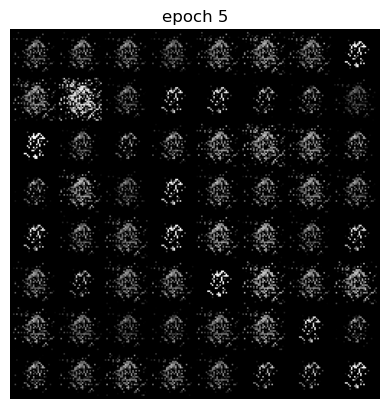

Epoch 5 of 100
Generator loss: -0.02480740, Discriminator loss: 0.03989799


118it [00:15,  7.86it/s]                         


Epoch 6 of 100
Generator loss: -0.14720331, Discriminator loss: 0.37067752


118it [00:15,  7.81it/s]                         


Epoch 7 of 100
Generator loss: -0.00003692, Discriminator loss: 0.00027089


118it [00:15,  7.84it/s]                         


Epoch 8 of 100
Generator loss: -0.00003704, Discriminator loss: 0.00015943


118it [00:15,  7.68it/s]                         


Epoch 9 of 100
Generator loss: -0.00006753, Discriminator loss: 0.00014269


118it [00:15,  7.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


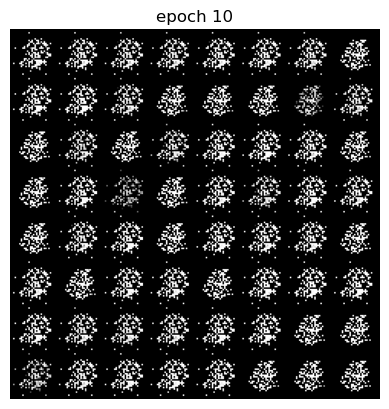

Epoch 10 of 100
Generator loss: -0.00006670, Discriminator loss: 0.00015473


118it [00:15,  7.47it/s]                         


Epoch 11 of 100
Generator loss: -0.00004531, Discriminator loss: 0.00012049


118it [00:15,  7.49it/s]                         


Epoch 12 of 100
Generator loss: -0.00002028, Discriminator loss: 0.00011057


118it [00:15,  7.48it/s]                         


Epoch 13 of 100
Generator loss: -0.00002223, Discriminator loss: 0.00005746


118it [00:15,  7.66it/s]                         


Epoch 14 of 100
Generator loss: -0.00003279, Discriminator loss: 0.00006445


118it [00:15,  7.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


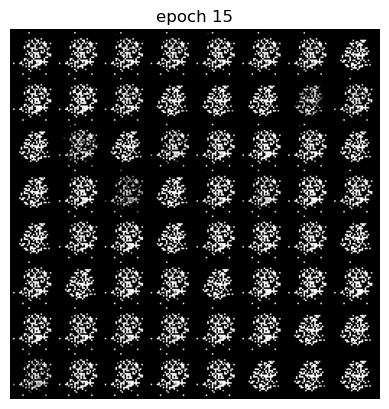

Epoch 15 of 100
Generator loss: -0.00007234, Discriminator loss: 0.00021825


118it [00:15,  7.74it/s]                         


Epoch 16 of 100
Generator loss: -0.04065666, Discriminator loss: 0.10445194


118it [00:15,  7.75it/s]                         


Epoch 17 of 100
Generator loss: -0.00000163, Discriminator loss: 0.00010596


118it [00:17,  6.64it/s]                         


Epoch 18 of 100
Generator loss: -0.00000575, Discriminator loss: 0.00005415


118it [00:16,  7.36it/s]                         


Epoch 19 of 100
Generator loss: -0.00000351, Discriminator loss: 0.00003875


118it [00:15,  7.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


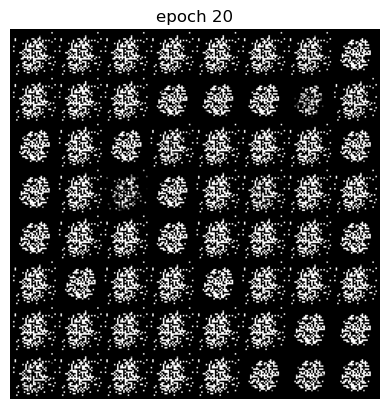

Epoch 20 of 100
Generator loss: -0.00000759, Discriminator loss: 0.00003166


118it [00:15,  7.62it/s]                         


Epoch 21 of 100
Generator loss: -0.00000292, Discriminator loss: 0.00002829


118it [00:15,  7.74it/s]                         


Epoch 22 of 100
Generator loss: -0.00000175, Discriminator loss: 0.00002590


118it [00:15,  7.75it/s]                         


Epoch 23 of 100
Generator loss: -0.00000139, Discriminator loss: 0.00003072


118it [00:15,  7.73it/s]                         


Epoch 24 of 100
Generator loss: -0.00000516, Discriminator loss: 0.00002414


118it [00:15,  7.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


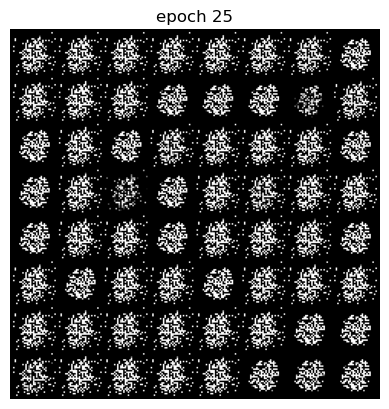

Epoch 25 of 100
Generator loss: -0.00000361, Discriminator loss: 0.00001245


118it [00:15,  7.69it/s]                         


Epoch 26 of 100
Generator loss: -0.00000177, Discriminator loss: 0.00001041


118it [00:15,  7.56it/s]                         


Epoch 27 of 100
Generator loss: -0.00000965, Discriminator loss: 0.00001159


118it [00:15,  7.85it/s]                         


Epoch 28 of 100
Generator loss: -0.00000162, Discriminator loss: 0.00001247


118it [00:14,  7.97it/s]                         


Epoch 29 of 100
Generator loss: -0.00000187, Discriminator loss: 0.00000915


118it [00:14,  7.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


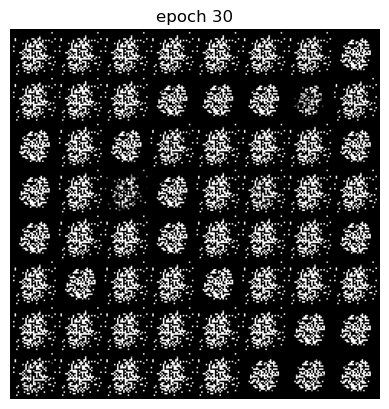

Epoch 30 of 100
Generator loss: -0.00000181, Discriminator loss: 0.00000712


118it [00:14,  7.94it/s]                         


Epoch 31 of 100
Generator loss: -0.00000498, Discriminator loss: 0.00000729


118it [00:14,  7.87it/s]                         


Epoch 32 of 100
Generator loss: -0.00000138, Discriminator loss: 0.00001060


118it [00:14,  7.98it/s]                         


Epoch 33 of 100
Generator loss: -0.00000056, Discriminator loss: 0.00000695


118it [00:14,  7.98it/s]                         


Epoch 34 of 100
Generator loss: -0.00000112, Discriminator loss: 0.00000718


118it [00:14,  7.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


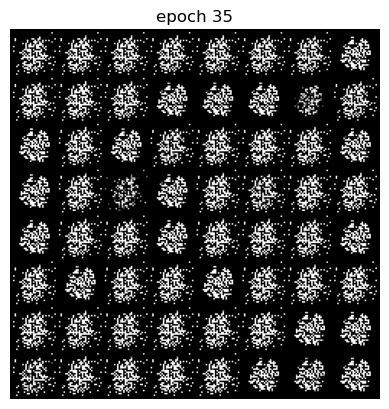

Epoch 35 of 100
Generator loss: -0.00006205, Discriminator loss: 0.00001470


118it [00:14,  7.92it/s]                         


Epoch 36 of 100
Generator loss: -0.00000518, Discriminator loss: 0.00001789


118it [00:14,  7.99it/s]                         


Epoch 37 of 100
Generator loss: -0.00000164, Discriminator loss: 0.00000957


118it [00:15,  7.87it/s]                         


Epoch 38 of 100
Generator loss: -0.00000313, Discriminator loss: 0.00000711


118it [00:14,  7.89it/s]                         


Epoch 39 of 100
Generator loss: -0.00000235, Discriminator loss: 0.00000546


118it [00:15,  7.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


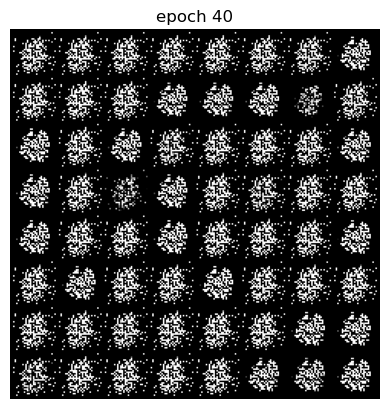

Epoch 40 of 100
Generator loss: -0.00001150, Discriminator loss: 0.00000794


118it [00:14,  7.94it/s]                         


Epoch 41 of 100
Generator loss: -0.00000245, Discriminator loss: 0.00000716


118it [00:14,  7.97it/s]                         


Epoch 42 of 100
Generator loss: -0.00000139, Discriminator loss: 0.00000833


118it [00:14,  7.92it/s]                         


Epoch 43 of 100
Generator loss: -0.00000018, Discriminator loss: 0.00000530


118it [00:15,  7.74it/s]                         


Epoch 44 of 100
Generator loss: -0.00000185, Discriminator loss: 0.00000388


118it [00:15,  7.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


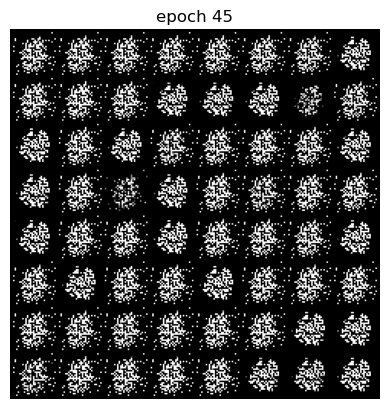

Epoch 45 of 100
Generator loss: -0.00000034, Discriminator loss: 0.00000416


118it [00:14,  7.90it/s]                         


Epoch 46 of 100
Generator loss: -0.00000064, Discriminator loss: 0.00000326


118it [00:14,  7.92it/s]                         


Epoch 47 of 100
Generator loss: -0.00000373, Discriminator loss: 0.00000539


118it [00:15,  7.87it/s]                         


Epoch 48 of 100
Generator loss: -0.00000082, Discriminator loss: 0.00000261


118it [00:14,  7.89it/s]                         


Epoch 49 of 100
Generator loss: -0.00000044, Discriminator loss: 0.00001256


118it [00:14,  7.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


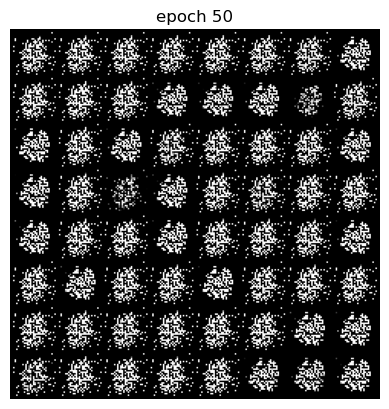

Epoch 50 of 100
Generator loss: -0.00000007, Discriminator loss: 0.00000166


118it [00:14,  7.96it/s]                         


Epoch 51 of 100
Generator loss: -0.00000016, Discriminator loss: 0.00000219


118it [00:14,  7.94it/s]                         


Epoch 52 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000164


118it [00:14,  7.97it/s]                         


Epoch 53 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000120


118it [00:14,  7.95it/s]                         


Epoch 54 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000105


118it [00:14,  7.91it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


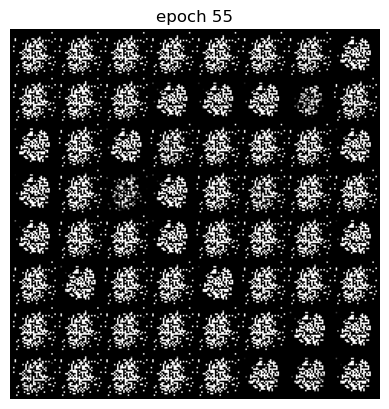

Epoch 55 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000088


118it [00:16,  7.31it/s]                         


Epoch 56 of 100
Generator loss: -0.00000080, Discriminator loss: 0.00000086


118it [00:15,  7.48it/s]                         


Epoch 57 of 100
Generator loss: -0.00000012, Discriminator loss: 0.00000079


118it [00:14,  7.90it/s]                         


Epoch 58 of 100
Generator loss: -0.00000005, Discriminator loss: 0.00000070


118it [00:14,  7.89it/s]                         


Epoch 59 of 100
Generator loss: -0.00000010, Discriminator loss: 0.00000054


118it [00:15,  7.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


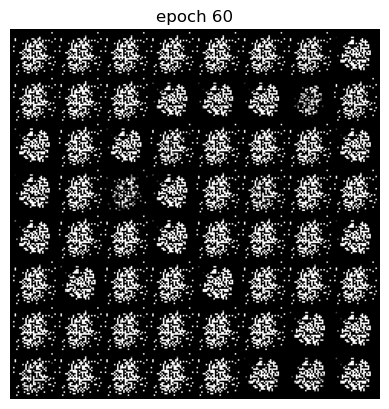

Epoch 60 of 100
Generator loss: -0.00000006, Discriminator loss: 0.00000085


118it [00:14,  7.92it/s]                         


Epoch 61 of 100
Generator loss: -0.00000068, Discriminator loss: 0.00000052


118it [00:14,  7.89it/s]                         


Epoch 62 of 100
Generator loss: -0.00000004, Discriminator loss: 0.00000055


118it [00:14,  7.92it/s]                         


Epoch 63 of 100
Generator loss: -0.00000004, Discriminator loss: 0.00000075


118it [00:15,  7.80it/s]                         


Epoch 64 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000045


118it [00:14,  7.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


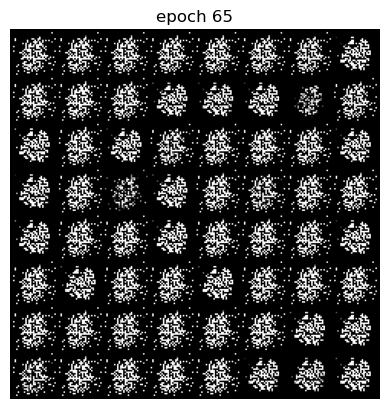

Epoch 65 of 100
Generator loss: -0.00000006, Discriminator loss: 0.00000050


118it [00:15,  7.83it/s]                         


Epoch 66 of 100
Generator loss: -0.00000001, Discriminator loss: 0.00000054


118it [00:14,  7.92it/s]                         


Epoch 67 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000044


118it [00:14,  7.96it/s]                         


Epoch 68 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000041


118it [00:15,  7.86it/s]                         


Epoch 69 of 100
Generator loss: -0.00000004, Discriminator loss: 0.00000034


118it [00:15,  7.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


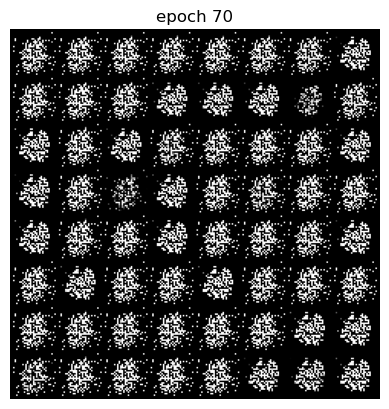

Epoch 70 of 100
Generator loss: -0.00000008, Discriminator loss: 0.00000036


118it [00:15,  7.63it/s]                         


Epoch 71 of 100
Generator loss: -0.00000004, Discriminator loss: 0.00000032


118it [00:14,  7.88it/s]                         


Epoch 72 of 100
Generator loss: -0.00000008, Discriminator loss: 0.00000027


118it [00:14,  7.93it/s]                         


Epoch 73 of 100
Generator loss: -0.00000013, Discriminator loss: 0.00000025


118it [00:14,  7.96it/s]                         


Epoch 74 of 100
Generator loss: -0.00000014, Discriminator loss: 0.00000026


118it [00:14,  7.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


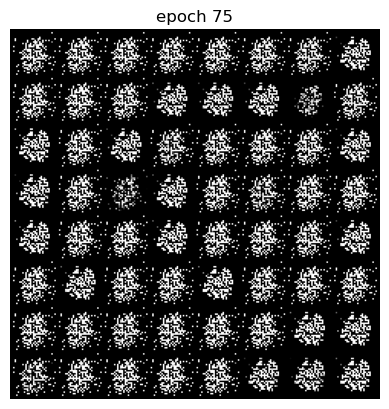

Epoch 75 of 100
Generator loss: -0.00000006, Discriminator loss: 0.00000024


118it [00:16,  7.28it/s]                         


Epoch 76 of 100
Generator loss: -0.00000009, Discriminator loss: 0.00000060


118it [00:16,  7.30it/s]                         


Epoch 77 of 100
Generator loss: -0.00000014, Discriminator loss: 0.00000027


118it [00:15,  7.64it/s]                         


Epoch 78 of 100
Generator loss: -0.00000004, Discriminator loss: 0.00000050


118it [00:14,  7.87it/s]                         


Epoch 79 of 100
Generator loss: -0.00000007, Discriminator loss: 0.00000035


118it [00:14,  7.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


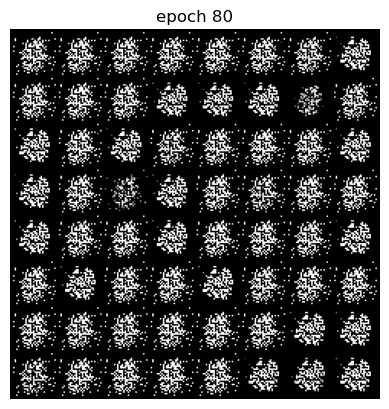

Epoch 80 of 100
Generator loss: -0.00000012, Discriminator loss: 0.00000024


118it [00:14,  7.95it/s]                         


Epoch 81 of 100
Generator loss: -0.00000026, Discriminator loss: 0.00000023


118it [00:14,  7.91it/s]                         


Epoch 82 of 100
Generator loss: -0.00000007, Discriminator loss: 0.00000024


118it [00:14,  7.93it/s]                         


Epoch 83 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000017


118it [00:14,  8.01it/s]                         


Epoch 84 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000016


118it [00:14,  7.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


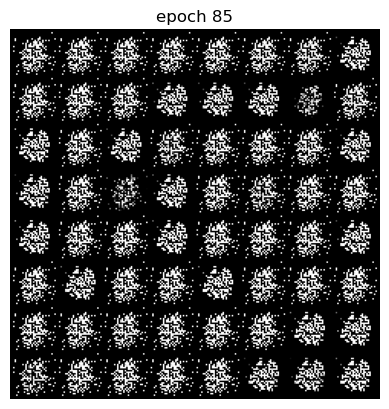

Epoch 85 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000015


118it [00:14,  7.95it/s]                         


Epoch 86 of 100
Generator loss: -0.00000004, Discriminator loss: 0.00000041


118it [00:14,  7.98it/s]                         


Epoch 87 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000019


118it [00:14,  7.89it/s]                         


Epoch 88 of 100
Generator loss: -0.00000721, Discriminator loss: 0.00000773


118it [00:14,  7.99it/s]                         


Epoch 89 of 100
Generator loss: -0.00000010, Discriminator loss: 0.00000055


118it [00:15,  7.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


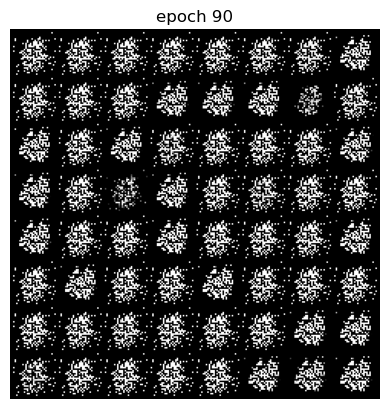

Epoch 90 of 100
Generator loss: -0.00000009, Discriminator loss: 0.00000039


118it [00:16,  7.25it/s]                         


Epoch 91 of 100
Generator loss: -0.00000009, Discriminator loss: 0.00000024


118it [00:16,  7.05it/s]                         


Epoch 92 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000026


118it [00:15,  7.63it/s]                         


Epoch 93 of 100
Generator loss: -0.00000003, Discriminator loss: 0.00000014


118it [00:15,  7.55it/s]                         


Epoch 94 of 100
Generator loss: -0.00000001, Discriminator loss: 0.00000017


118it [00:15,  7.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


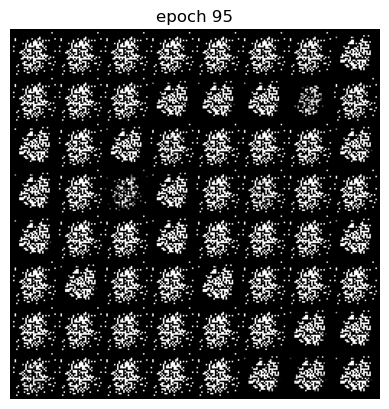

Epoch 95 of 100
Generator loss: -0.00000001, Discriminator loss: 0.00000010


118it [00:16,  7.05it/s]                         


Epoch 96 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000009


118it [00:15,  7.44it/s]                         


Epoch 97 of 100
Generator loss: -0.00000001, Discriminator loss: 0.00000008


118it [00:15,  7.46it/s]                         


Epoch 98 of 100
Generator loss: -0.00000001, Discriminator loss: 0.00000008


118it [00:15,  7.45it/s]                         


Epoch 99 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000006


118it [00:15,  7.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


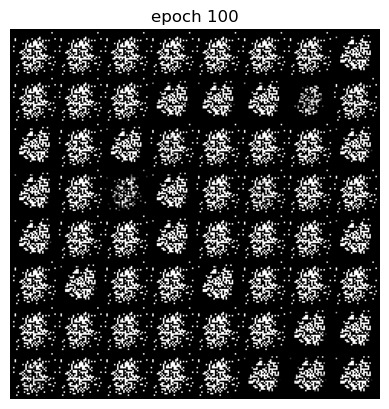

Epoch 100 of 100
Generator loss: -0.00000002, Discriminator loss: 0.00000006


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE #########
    return 1
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return 1
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0

    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_images = data[0]
        fake_images = generator(noise)
       
        optim_d.zero_grad()
        #Update discriminator for real images.
        labels_d = discriminator(real_images)
        dl_real = criterion(labels_d, label_real(real_images.size(0)))
        dl_real.backward()
        loss_d += dl_real.item() 
    
    
        #Update discriminator for fake images created from noise.
        labels_d = discriminator(fake_images)
        dl_fake = criterion(labels_d, label_fake(fake_images.size(0)))
        dl_fake.backward()
        loss_d += dl_fake.item()
        
        
        optim_d.step()
        
        
        ##GENERATOR:
        fake_images = generator(noise)
        optim_g.zero_grad()
        labels_d = discriminator(fake_images)
        #Generator loss how many images discriminator was able to identify as true, bigger the better. Run gradient descent on it.
        gl_fake = -criterion(labels_d, label_fake(fake_images.size(0)))
        gl_fake.backward()
        optim_g.step()
        
        
        ##Print loss
        loss_g += gl_fake.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

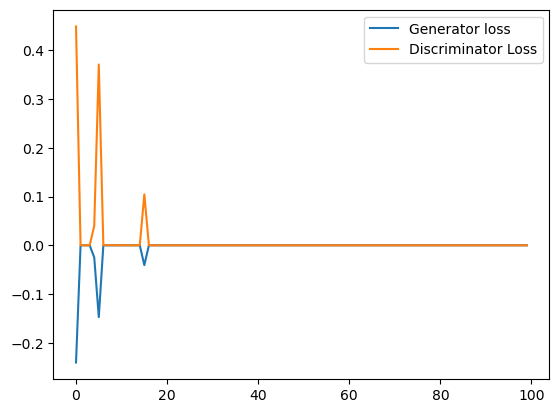

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')